Import libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

Import data

In [113]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('expected.csv')

Split train data into features dataframe and expected values dataframe

In [114]:
df1_x = df1.drop('y', axis=1)
df1_y = df1['y']

Remove any duplicate rows

In [115]:
# # remove duplicate rows in df1_x and corresponding rows in df1_y
df1_x.drop_duplicates(inplace=True)
df1_y = df1_y.loc[df1_x.index]

Check the distribution of the data in each column

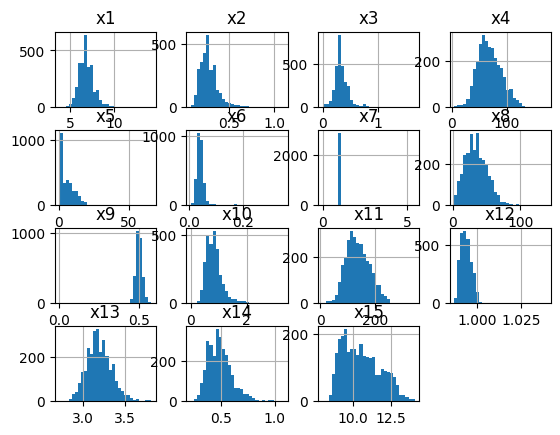

In [116]:
df1_x.hist(bins=30)
plt.show()

Fill missing values with median and mean

In [117]:
means = ['x1','x3','x13']
medians = ['x2','x4','x5','x6','x7','x8','x9','x10','x11','x12','x14','x15']

for i in means:
  df1_x[i].fillna(df1_x[i].median(), inplace=True)

for j in medians:
  df1_x[j].fillna(df1_x[j].median(), inplace=True)


Check for outliers

<Axes: >

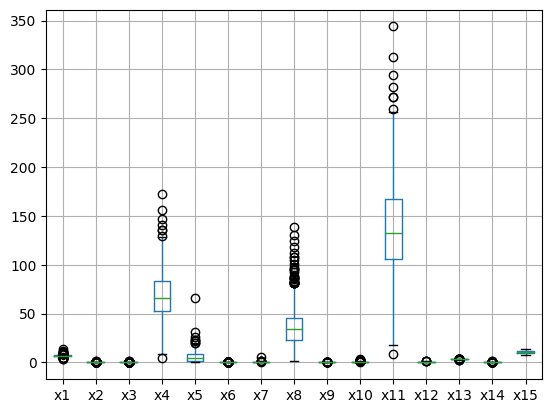

In [118]:
# plot the boxplot
df1_x.boxplot()

Replace outliers with median

<Axes: >

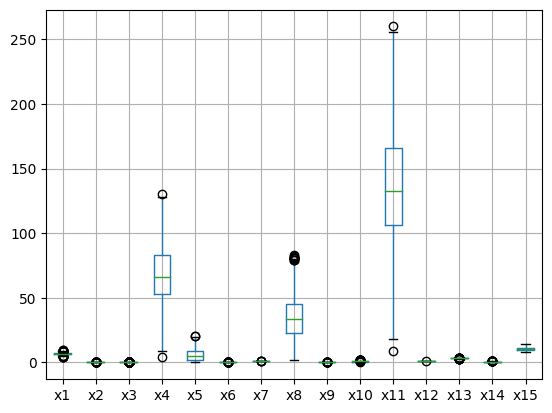

In [119]:
for col in df1_x.columns:
    median = df1_x[col].median()
    std = df1[col].std()
    df1_x[col] = np.where(np.abs(df1_x[col] - median) > 3*std, median, df1_x[col])

df1_x.boxplot()

Check the correlation between features

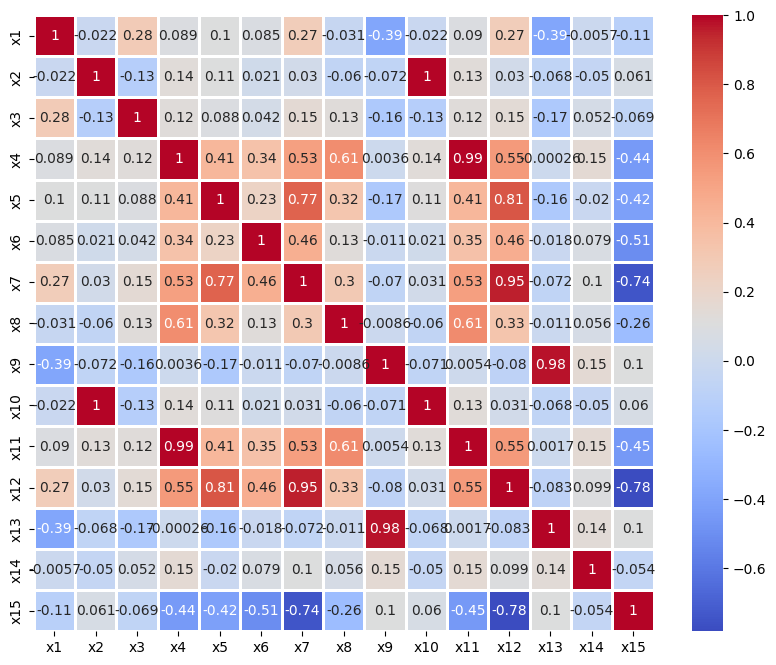

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1_x.corr(), linewidths=0.90, annot=True, cmap='coolwarm')
plt.show()

Remove highly correlated features

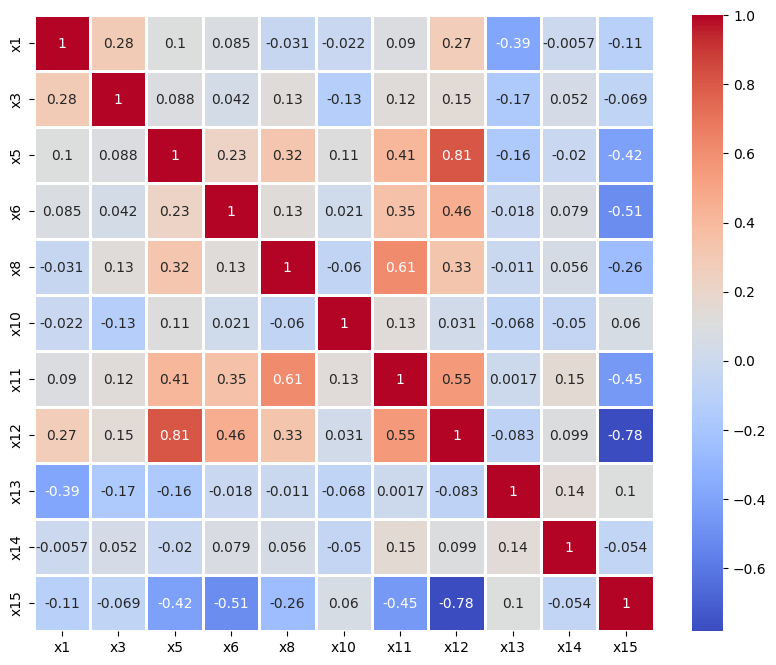

In [121]:
corr_matrix = df1_x.corr()

# Create a boolean mask to identify highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr_features = corr_matrix.mask(mask).stack().sort_values(ascending=False)

# Drop highly correlated features
to_drop = []
for (feature_1, feature_2), corr in high_corr_features.iteritems():
    if corr > 0.95:
        if feature_1 not in to_drop:
            to_drop.append(feature_2)
df1_x.drop(to_drop, axis=1, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(df1_x.corr(), linewidths=0.90, annot=True, cmap='coolwarm')
plt.show()

Scale the data

In [122]:
from sklearn.preprocessing import MinMaxScaler

# create an instance of the scaler
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
df1_x_scaled = scaler.fit_transform(df1_x)

df1_x_scaled = pd.DataFrame(df1_x_scaled, columns=df1_x.columns, index=df1_x.index)

df1_x = df1_x_scaled

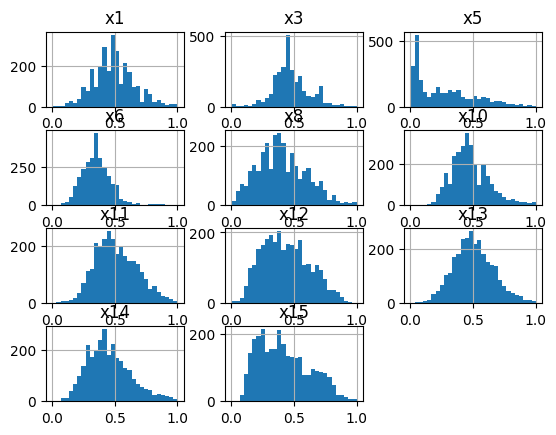

In [123]:
df1_x.hist(bins=30)
plt.show()

Select best features to train the model.

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=7)
X_new = selector.fit_transform(df1_x, df1_y)

# X_new will contain only the top 7 features, as selected by SelectKBest
df1_selected = pd.DataFrame(X_new, columns=df1_x.columns[selector.get_support()], index=df1_x.index)
features = df1_selected.columns.tolist()

df1_selected.head()

,x5,x6,x8,x10,x11,x12,x15
0,0.285714,0.229167,0.493827,0.604790,0.494024,0.233202,0.743802
1,0.051020,0.562500,0.419753,0.730539,0.310757,0.275362,0.462810
2,0.204082,0.187500,0.333333,0.461078,0.330677,0.239130,0.661157
3,0.056122,0.395833,0.172840,0.353293,0.362550,0.343215,0.429752
4,0.015306,0.229167,0.333333,0.407186,0.306773,0.134387,0.694215


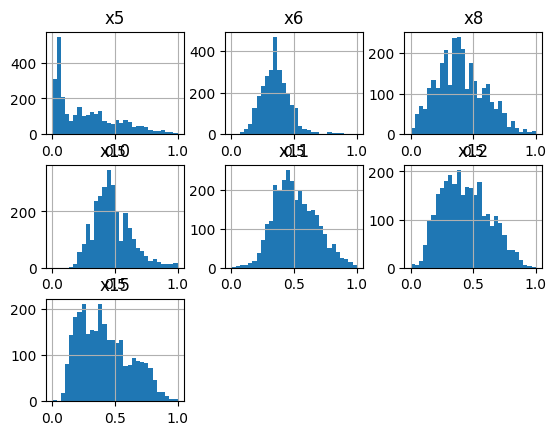

In [125]:
df1_selected.hist(bins=30)
plt.show()

In [126]:
x_train = df1_selected[features]
y_train = df1_y


Fill the missing values in test data.

In [127]:
medians = features

for j in medians:
  df2[j].fillna(df2[j].median(), inplace=True)

In [128]:
x_test = df2[features]
y_test = df3


Scale the test data as well.

In [129]:
from sklearn.preprocessing import MinMaxScaler

# create an instance of the scaler
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
x_test_scaled = scaler.fit_transform(x_test)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

x_test = x_test_scaled

Use KNN algorithm

In [130]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score

knn_classifier = KNeighborsClassifier(n_neighbors=100)

# Fitting the model
knn_classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 43.6 %.


Save the final pre-processed train dataset.

In [131]:
# Combine x_train and y_train horizontally using pd.concat
train_df = pd.concat([x_train, y_train], axis=1)
train_df.to_csv('200088D_lab1_train.csv', index=False)
train_df.head()

,x5,x6,x8,x10,x11,x12,x15,y
0,0.285714,0.229167,0.493827,0.604790,0.494024,0.233202,0.743802,6
1,0.051020,0.562500,0.419753,0.730539,0.310757,0.275362,0.462810,6
2,0.204082,0.187500,0.333333,0.461078,0.330677,0.239130,0.661157,7
3,0.056122,0.395833,0.172840,0.353293,0.362550,0.343215,0.429752,6
4,0.015306,0.229167,0.333333,0.407186,0.306773,0.134387,0.694215,6


Save the final pre-processed test dataset.

In [132]:
# Combine x_test and y_test horizontally using pd.concat
test_df = pd.concat([x_test, y_test], axis=1)
test_df.to_csv('200088D_lab1_test.csv', index=False)
test_df.head()

,x5,x6,x8,x10,x11,x12,x15,y
0,0.012903,0.083032,0.125874,0.569892,0.225581,0.253989,0.103448,6
1,0.461290,0.086643,0.234266,0.365591,0.369767,0.425614,0.344828,6
2,0.106452,0.166065,0.087413,0.290323,0.439535,0.387667,0.327586,7
3,0.029032,0.057762,0.118881,0.268817,0.165116,0.090125,0.655172,6
4,0.019355,0.075812,0.048951,0.322581,0.258140,0.266925,0.137931,6
